In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import re
import pandas as pd

# Initialize an empty list to store dataframes
df_list = []

# Regular expression to match the filenames and extract IDs
pattern = re.compile(r"curvature_torus_ratio_4.0_from_(\d+)_to_(\d+)\.csv")

# Iterate over all files in the directory (replace '.' with your directory path)
for filename in os.listdir('.'):
    match = pattern.match(filename)
    if match:
        # Extract the range of ids from the filename
        start_id, end_id = map(int, match.groups())

        # Read the csv file into a DataFrame
        df = pd.read_csv(filename, header=None)
        
        # Create a new column for the ids
        df['id'] = range(start_id, end_id)
        
        # Append the DataFrame to the list
        df_list.append(df)

# Concatenate all DataFrames in the list
final_df = pd.concat(df_list, ignore_index=True)
final_df = final_df.set_index('id').sort_index()
# Save the final DataFrame to a new csv file
# final_df.to_csv('curvature_torus_ratio_4_combined.csv', index=False)
np.savetxt("curvature_torus_ratio_4.0_combined.csv", final_df.values)
# Show the head of the final DataFrame as a sample

In [3]:
final_df = pd.DataFrame(np.loadtxt("curvature_torus_ratio_4.0_combined.csv", delimiter=','))

In [4]:
torus = np.loadtxt('torus_cloud_ratio_4.0.csv', delimiter=',')

In [5]:
final_df2 = pd.read_csv("torus_K_ratio_4.0.csv", header=None)

In [6]:
final_df.iloc[:100,:]

,0
0,1.014345
1,1.016856
2,1.008672
3,1.014537
4,1.007599
...,...
95,1.016145
96,1.006898
97,1.017424
98,1.014515


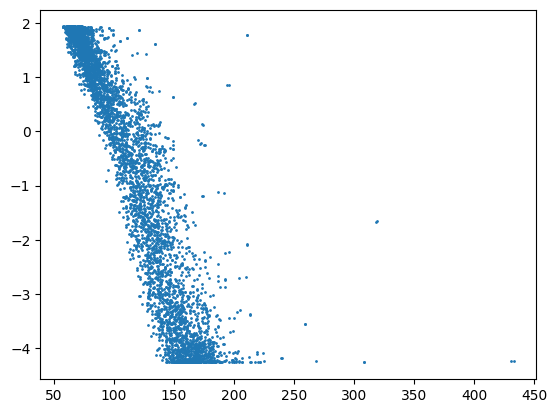

In [20]:
computed_cur = np.log(final_df.values) / 0.0001
plt.scatter(computed_cur, final_df2.values, s=1)

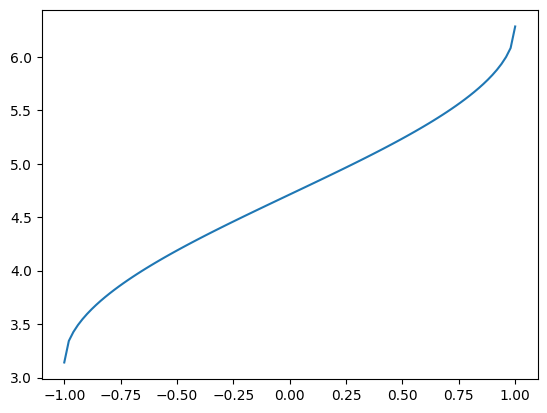

In [24]:
xs = np.linspace(-1, 1, 100)
ys = 2*np.pi-np.arccos(xs)
plt.plot(xs, ys)

In [8]:
final_df2

,0
0,-2.965949
1,-4.172581
2,1.325000
3,-1.788277
4,1.449862
...,...
4995,1.351973
4996,1.640581
4997,1.859854
4998,-3.045657


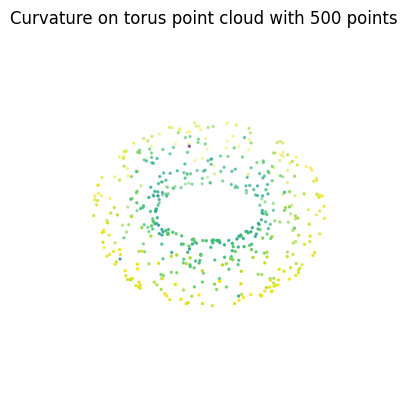

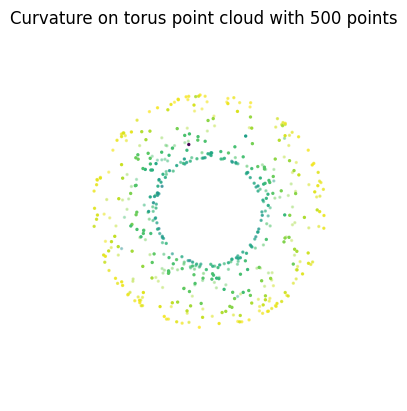

In [9]:
num_eval = 500
v = final_df.values[:num_eval, :]
# Visualize the point cloud

# # Find the minimum and maximum values across all axes
# min_val = torus[:num_eval].min()
# max_val = torus[:num_eval].max()

# # Set the same limits for all axes to ensure equal unit lengths
# ax.set_xlim([min_val, max_val])
# ax.set_ylim([min_val, max_val])
# ax.set_zlim([min_val, max_val])
# # Add axis labels
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')

# cc = - v
cc =  -v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus[:num_eval, 0], torus[:num_eval, 1], torus[:num_eval, 2], s=2, c = cc)
# Add a colorbar
# cbar = plt.colorbar(scatter)
ax.set_title(f"Curvature on torus point cloud with {num_eval} points")
ax.view_init(45, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("torus_ratio_4.png", dpi = 300)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus[:num_eval, 0], torus[:num_eval, 1], torus[:num_eval, 2], s=2, c = cc)
ax.set_title(f"Curvature on torus point cloud with {num_eval} points")
ax.view_init(90, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("torus_birdview_ratio_4.png", dpi = 300)

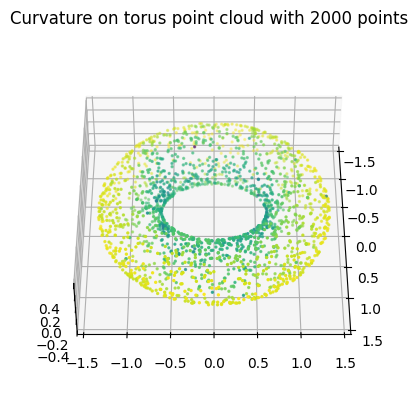

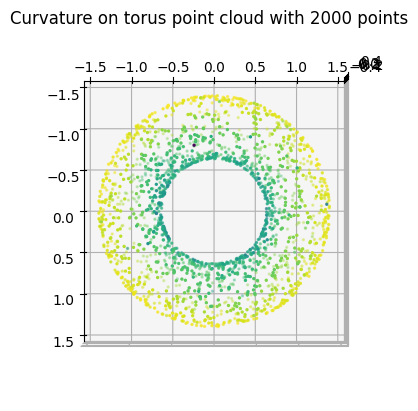

In [10]:
num_eval = 2000
v = final_df.values[:num_eval, :]
# Visualize the point cloud
cc = - v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus[:num_eval, 0], torus[:num_eval, 1], torus[:num_eval, 2], s=2, c = cc)
ax.set_title(f"Curvature on torus point cloud with {num_eval} points")
ax.view_init(45, 0)
# plt.axis('off')
ax.set_aspect('equal')
plt.savefig("torus_ratio_4.png", dpi = 300)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus[:num_eval, 0], torus[:num_eval, 1], torus[:num_eval, 2], s=2, c = cc)
ax.set_title(f"Curvature on torus point cloud with {num_eval} points")
ax.view_init(90, 0)
# plt.axis('off')
ax.set_aspect('equal')
plt.savefig("torus_birdview_ratio_4.png", dpi = 300)

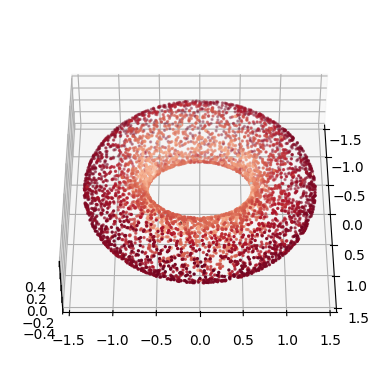

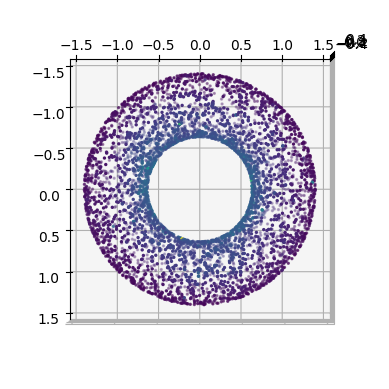

In [11]:
from matplotlib.colors import Normalize, TwoSlopeNorm

num_eval = 5000
v = final_df.values[:num_eval, :]
# Visualize the point cloud
# cc = - v
cc = v

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus[:num_eval, 0], torus[:num_eval, 1], torus[:num_eval, 2], s=2, c = cc, cmap='RdGy')
# ax.set_title(f"Curvature on torus point cloud with {num_eval} points")
ax.view_init(45, 0)
# plt.axis('off')
ax.set_aspect('equal')
plt.savefig("torus_ratio_4.png", dpi = 300)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus[:num_eval, 0], torus[:num_eval, 1], torus[:num_eval, 2], s=2, c = cc)
# ax.set_title(f"Curvature on torus point cloud with {num_eval} points")
ax.view_init(90, 0)
# plt.axis('off')
ax.set_aspect('equal')
plt.savefig("torus_birdview_ratio_4.png", dpi = 300)

(array([ 55., 220., 311., 335., 278., 244., 188., 153., 131., 131., 118.,
        102., 108., 127.,  97., 122., 131., 150., 156., 134., 170., 144.,
        137., 148., 157., 135., 122., 114.,  99., 122.,  74.,  61.,  50.,
         25.,  17.,  14.,   6.,  13.,   8.,   3.,   6.,   4.,   4.,   3.,
          1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([1.0057555 , 1.00614043, 1.00652535, 1.00691028, 1.00729521,
        1.00768014, 1.00806507, 1.00844999, 1.00883492, 1.00921985,
        1.00960478, 1.00998971, 1.01037463, 1.01075956, 1.01114449,
        1.01152942, 1.01191435, 1.01229927, 1.0126842 , 1.01306913,
        1.01345406, 1.01383899, 1.01422391, 1.

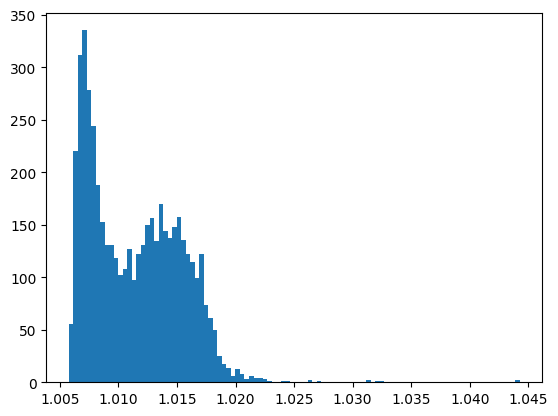

In [12]:
plt.hist(v, 100)

0    4939
dtype: int64
4933


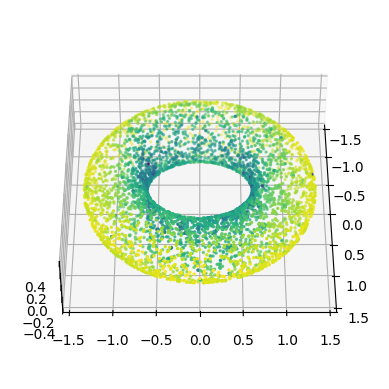

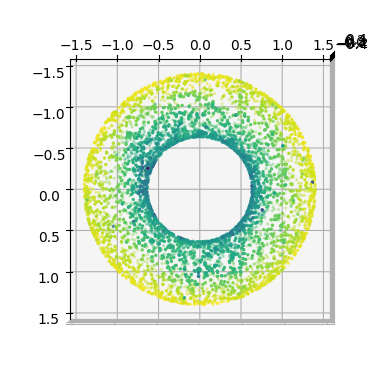

In [13]:
from matplotlib.colors import Normalize, TwoSlopeNorm

num_eval = 5000
v = final_df.values[:num_eval, :]
# Visualize the point cloud
# cc = v
print((1-final_df.isna()).sum())
# valid_ids = (v < 1017).flatten()
valid_ids = (v < 1.030).flatten()
print(valid_ids.sum())
cc = - v[valid_ids]

# cc = (cc - cc.mean())/cc.std()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus[valid_ids, 0], torus[valid_ids, 1], torus[valid_ids, 2], s=2, c = cc)#, cmap='plasma')
# ax.set_title(f"Curvature on torus point cloud with {num_eval} points")
ax.view_init(45, 0)
# plt.axis('off')
ax.set_aspect('equal')
plt.savefig("torus_ratio_4.png", dpi = 300)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus[valid_ids, 0], torus[valid_ids, 1], torus[valid_ids, 2], s=2, c = cc)#, cmap='inferno')
# ax.set_title(f"Curvature on torus point cloud with {num_eval} points")
ax.view_init(90, 0)
# plt.axis('off')
ax.set_aspect('equal')
plt.savefig("torus_birdview_ratio_4.png", dpi = 300)

In [14]:
valid_ids.shape

(5000,)

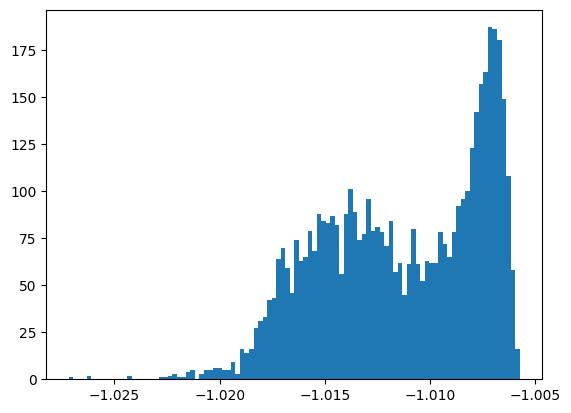

In [15]:
plt.hist(cc, 100)
plt.show()

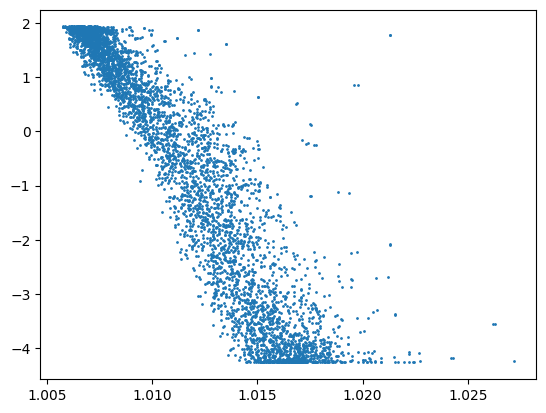

In [16]:
plt.scatter(final_df.values[valid_ids], final_df2.values[valid_ids], s=1)